In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1. Загрузите файл HR.csv в pandas dataframe

In [2]:
df = pd.read_csv('HR.csv')

In [3]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### 2. Рассчитайте основные статистики для переменных 10 (среднее,медиана,мода,мин/макс,сред.отклонение).

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


3. 1: Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.

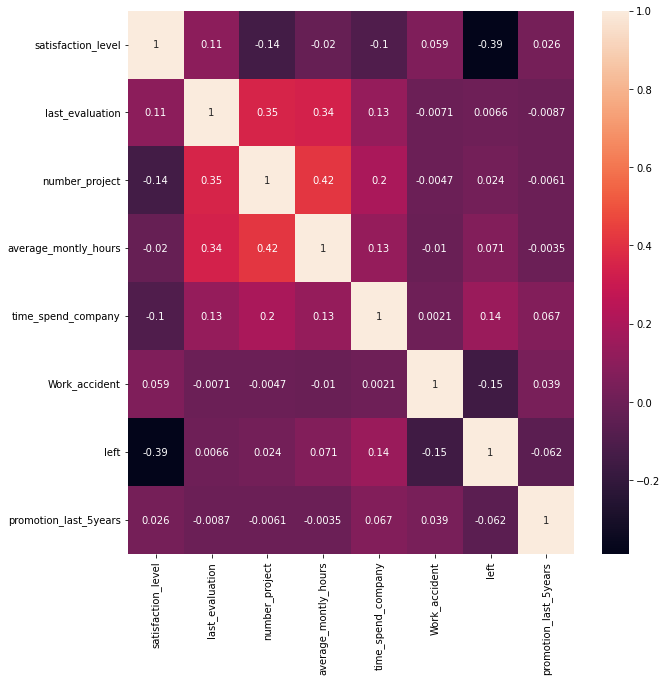

In [29]:
df_corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, annot=True)

plt.show()

### 3. 2: Определите две самые скоррелированные и две наименее скоррелированные переменные.

Cамые скоррелированные величины - number_project и average_monthly_hours с корреляцией 0.42.

Т.е. количество часов работы в месяц влияет на количество выполненных проектов.

Наименее скоррелированные - satisfaction_level и left с корреляцией -0.39.

Т.е. чем выше уровень удовлетворённости работой, тем меньше вероятность увольнения сотрудника.

### 4. Рассчитайте сколько сотрудников работает в каждом 5 департаменте.

In [20]:
df.groupby('department').size()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64

### 5. Показать распределение сотрудников по зарплатам.

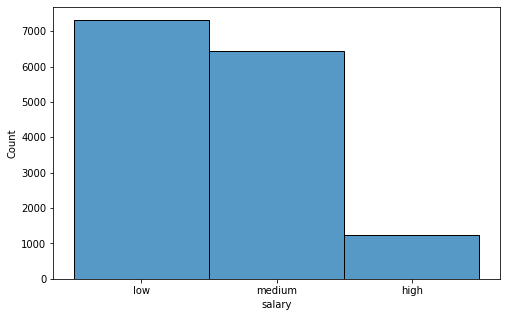

In [28]:
plt.figure(figsize=(8, 5))
sns.histplot(df['salary'])
plt.show()

### 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [37]:
departments = df['department'].unique()

print(len(departments))

10


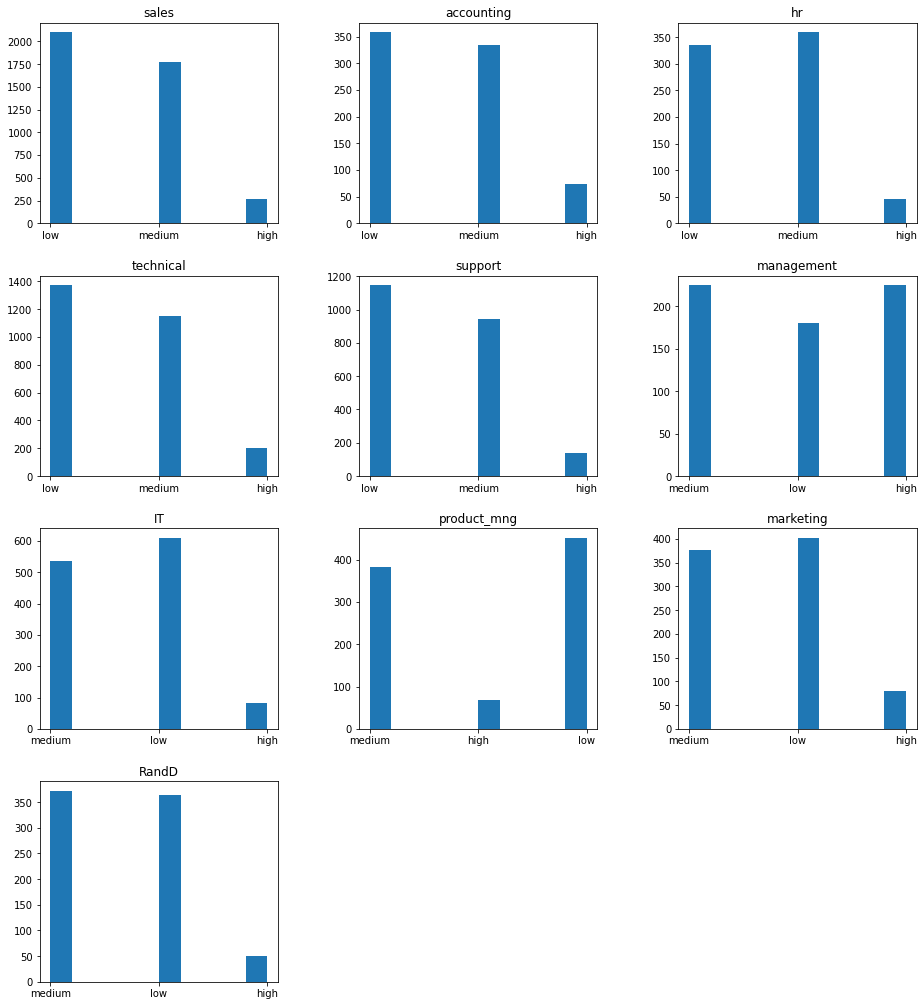

In [55]:
nrows = 4
ncols = 3
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(14, 15))

fig.tight_layout(pad=5.0)

for i in range(len(departments)):
    department = departments[i]
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.hist(df[df['department'] == department]['salary'])
    #sns.histplot(df[df['department'] == department]['salary'])

    ax.set_title(department)
plt.show()

### 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [63]:
df[['salary', 'average_montly_hours']].groupby('salary').mean()

,average_montly_hours
salary,
high,199.867421
low,200.996583
medium,201.338349


Гипотеза не подтверждена - даже наоборот, сотрудники с более высокой оплатой проводят на работе чуть меньше времени.

### 8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности)

- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов

In [65]:
df[['left', 'promotion_last_5years', 'satisfaction_level', 'number_project']].groupby('left').mean()

,promotion_last_5years,satisfaction_level,number_project
left,,,
0,0.026251,0.666810,3.786664
1,0.005321,0.440098,3.855503


Доля сотрудников с повышением и средняя степень удовлетворённости у уволившихся сотрудников ниже.
А количество проектов - наоборот, немного выше.

### 9. Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)

Оценить качество модели на тестовой выборки

In [84]:
from sklearn.model_selection import train_test_split

df_x = df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years']]
X = df_x.to_numpy()
df_y = df['left']
y = df_y.to_numpy()
# df_x
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [89]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [90]:
lda.score(X_test, y_test)

0.7527272727272727

In [92]:
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [93]:
((lda.predict(X_test) - y_test) ** 2).c / len(X_test)

array([0.        , 0.        , 0.        , ..., 0.        , 0.00020202,
       0.        ])